<center><h1> Assignment 1</h1></center>

**Author(s):**
1. Marcelo Ortiz Villavicencio (marcelo.ortiz@emory.edu)
2. Jafet Baca Obando (jbacaob@emory.edu)

**Objectives**: This <ins>replication</ins> exercise aims at
 1. Making students comfortable using a *Jupyter Notebook* to kickstart an empirical project;
 2. Use *GitHub* to retrieve and submit computer code.

**Instructions**: This replication exercise is based on the material in Sections 2.2, 2.3, and 2.5 in Bruce Hansen's [Econometrics Lecture Notes](http://www.ssc.wisc.edu/~bhansen/econometrics/) (version posted on Canvas). Please write down your code and <ins>execute</ins> it in the cell below each question. _Full_ marks will not be given for just correct answers, but for (1) using the provisioned Virtual Machine (VM) on Google Cloud, (2) code elegance, (3) code proper documentation, and (4) practicality. ⚠ You _must_ use Python.

In [1]:
# imports
import requests, zipfile, io, os
import warnings
warnings.filterwarnings("ignore")
import sys
import shutil

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from scipy.stats.mstats import gmean

In [2]:
TEMPDIR = 'data/'
path_dataset = 'cps09mar/cps09mar.xlsx'

<center><h2> Questions</h2></center>

1. [2 points] Load the data _directly_ from the internet into a data frame, and create a local copy called `datos`. Then print the first 5 rows of the `datos` data frame.

In [3]:
# create temporary directory to save data
if not os.path.exists(TEMPDIR):
    os.mkdir(TEMPDIR)

In [4]:
# download zip data and save in folder temporary folder data
try:
    zip_file_url = 'https://www.ssc.wisc.edu/~bhansen/econometrics/Econometrics%20Data.zip'
    req = requests.get(zip_file_url)
    zip_file = zipfile.ZipFile(io.BytesIO(req.content))
    zip_file.extractall(TEMPDIR)
except Exception as e:
    print(e)
    print('Unable to read file from URL provided')
    sys.exit(1)

In [5]:
# read data from excel file and print de first 5 rows
df = pd.read_excel(f'{TEMPDIR}{path_dataset}', index_col=0).reset_index()
datos = df.copy()
datos.head(5)

,age,female,hisp,education,earnings,hours,week,union,uncov,region,race,marital
0,52,0,0,12,146000,45,52,0,0,1,1,1
1,38,0,0,18,50000,45,52,0,0,1,1,1
2,38,0,0,14,32000,40,51,0,0,1,1,1
3,41,1,0,13,47000,40,52,0,0,1,1,1
4,42,0,0,13,161525,50,52,1,0,1,1,1


Good!

2. [5 points] Pre-process the data and construct the variables ```wage``` and ```lwage``` (as $\log(\texttt{wage})$) as extra variables in your local copy of the data set (you called this ```datos``` above) you downloaded in the previous part. **Hint**: Read the data description and the code in Section 3.25 (pages 90-92) in Bruce Hansen's [Econometrics Lecture Notes](http://www.ssc.wisc.edu/~bhansen/econometrics/).

In [6]:
datos['wage'] = datos['earnings'] / (datos['hours']*datos['week'])
datos['lwage'] = np.log(datos['wage'])

Good!

3. [3 points] Verify that an _estimate_ of $\mathbb{E}[\log(\texttt{wage})]$ is $2.95$, i.e., ask your code to print your estimate in a user friendly manner.

In [7]:
mean = datos['lwage'].mean()
print(f'The expected value of log(wage) is: {round(mean,2)} per hour.')

The expected value of log(wage) is: 2.95 per hour.


Good!

4. [10 points] Replicate "Table 2.1: Mean Log Wages by Sex and Race" (page 17) in Bruce Hansen's [Econometrics Lecture Notes](http://www.ssc.wisc.edu/~bhansen/econometrics/), i.e., you are expected to provide a formatted table 'as is' printed in Bruce Hansen's [Econometrics Lecture Notes](http://www.ssc.wisc.edu/~bhansen/econometrics/) or as close as possible. **Hint:** Look at this [post](https://www.geeksforgeeks.org/how-to-render-pandas-dataframe-as-html-table/).

In [8]:
# compute lwage for each group
female_white = datos['lwage'][(datos['female']==1) & (datos['race']==1)]
female_black = datos['lwage'][(datos['female']==1) & (datos['race']==2)]
female_other = datos['lwage'][(datos['female']==1) & ~((datos['race']==1) & (datos['race']==2))]
male_white = datos['lwage'][(datos['female']==0) & (datos['race']==1)]
male_black = datos['lwage'][(datos['female']==0) & (datos['race']==2)]
male_other = datos['lwage'][(datos['female']==0) & ~((datos['race']==1) & (datos['race']==2))]

In [9]:
men_avg_race = [round(np.mean(profile),2) for profile in [male_white, male_black, male_other]]
women_avg_race = [round(np.mean(profile),2) for profile in [female_white, female_black, female_other]]

In [10]:
table_2_1 = pd.DataFrame({"Race": ['White', 'Black', 'Other'],
                     
                   "Men": men_avg_race,
                     
                   "Women": women_avg_race})
 
print("Table 2.1: Mean Log Wages by Gender and Rece")
display(table_2_1)  

# Bonus: you can copy this latex code and put in your latex document
print(table_2_1.to_latex(index=False))  

Table 2.1: Mean Log Wages by Gender and Rece


,Race,Men,Women
0,White,3.07,2.82
1,Black,2.86,2.73
2,Other,3.05,2.81


\begin{tabular}{lrr}
\toprule
 Race &  Men &  Women \\
\midrule
White & 3.07 &   2.82 \\
Black & 2.86 &   2.73 \\
Other & 3.05 &   2.81 \\
\bottomrule
\end{tabular}



5. [10 points] Replicate "Table 2.2: Average Wages and Percentage Differences" (page 20) in Bruce Hansen's [Econometrics Lecture Notes](http://www.ssc.wisc.edu/~bhansen/econometrics/), i.e., you are expected to provide a formatted table 'as is' printed in Bruce Hansen's [Econometrics Lecture Notes](http://www.ssc.wisc.edu/~bhansen/econometrics/) or as close as possible.  **Hint:** Look at this [post](https://www.geeksforgeeks.org/how-to-render-pandas-dataframe-as-html-table/).

In [11]:
def compute_stats_vector(vector):
    """
    This function compute the vector of stats based on
    an input numerical vector
    """
    mean = round(vector.mean(), 2)
    median = round(vector.median(), 2)
    geo_mean = round(gmean(vector), 2)
    
    log_vec = np.log(vector)
    mean_log = round(log_vec.mean(), 2)
    
    list_stats = [mean, median, geo_mean, mean_log]
    return list_stats

def compute_diff(vector1, vector2, correct_last_term = True):
    """
    
    """
    # make sure have same dimension
    assert len(vector1) == len(vector2)
    
    diff_vec = [round(((vector1[index] - vector2[index])/vector2[index])*100) for index in range(len(vector1)) ]
    
    if correct_last_term:
        diff_vec[-1] = round((list(vector1)[-1] - list(vector2)[-1])*100, 2)
        
    return diff_vec
        

In [12]:
men_wage = datos['wage'][datos['female']==0]
women_wage = datos['wage'][datos['female']==1]
men_stats = compute_stats_vector(men_wage)
women_stats = compute_stats_vector(women_wage)
diff = compute_diff(list(men_stats), list(women_stats))

In [13]:
table_2_2 = pd.DataFrame({"Stast": ['Mean', 'Median', 'Geometric', 'Mean log wage'],
                     
                   "Men": men_stats,
                     
                   "Women": women_stats,
                    "% Difference": diff})
 
print("Table 2.1: Mean Log Wages by Gender and Rece")
display(table_2_2)  

# Bonus: you can copy this latex code and put in your latex document
print(table_2_2.to_latex(index=False))  

Table 2.1: Mean Log Wages by Gender and Rece


,Stast,Men,Women,% Difference
0,Mean,26.80,20.00,34.0
1,Median,21.14,16.83,26.0
2,Geometric,21.03,16.64,26.0
3,Mean log wage,3.05,2.81,24.0


\begin{tabular}{lrrr}
\toprule
        Stast &   Men &  Women &  \% Difference \\
\midrule
         Mean & 26.80 &  20.00 &          34.0 \\
       Median & 21.14 &  16.83 &          26.0 \\
    Geometric & 21.03 &  16.64 &          26.0 \\
Mean log wage &  3.05 &   2.81 &          24.0 \\
\bottomrule
\end{tabular}



6. [10 points] Replicate "Figure 2.3: Expected Log Wage as a Function of Education" (page 20) in Bruce Hansen's [Econometrics Lecture Notes](http://www.ssc.wisc.edu/~bhansen/econometrics/).

In [14]:
datos.head()

,age,female,hisp,education,earnings,hours,week,union,uncov,region,race,marital,wage,lwage
0,52,0,0,12,146000,45,52,0,0,1,1,1,62.393162,4.133456
1,38,0,0,18,50000,45,52,0,0,1,1,1,21.367521,3.061872
2,38,0,0,14,32000,40,51,0,0,1,1,1,15.686275,2.752786
3,41,1,0,13,47000,40,52,0,0,1,1,1,22.596154,3.117780
4,42,0,0,13,161525,50,52,1,0,1,1,1,62.125000,4.129148


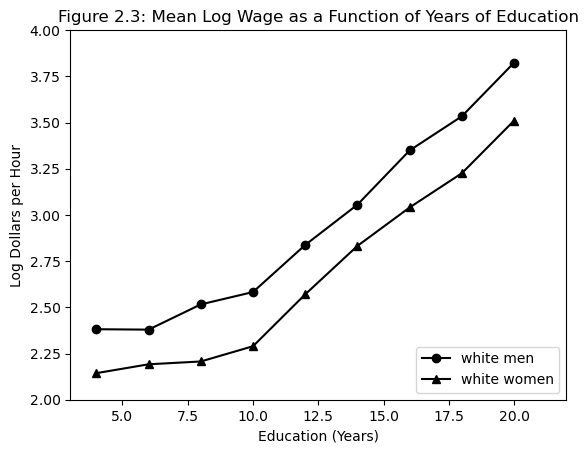

In [15]:
# take log hourly wage for each group

white_men = (datos['race']==1)&(datos['female']==0)
white_female = (datos['race']==1)&(datos['female']==1)

wm_lnwage = male_white
wf_lnwage = female_white
wm_edu = datos[white_men]['education']
wf_edu = datos[white_female]['education']

edu_years = list(range(4,22,2))

# calculate mean for each group
wm_mean = []
wf_mean = []

for i in range(len(edu_years)):
    wm_mean.append(wm_lnwage[wm_edu == edu_years[i]].mean())
    wf_mean.append(wf_lnwage[wf_edu == edu_years[i]].mean())

# plotting the figure
fig, ax = plt.subplots()
ax.plot(edu_years, wm_mean, marker = 'o', color = 'k', label = 'white men')
ax.plot(edu_years, wf_mean, marker = '^', color = 'k', label = 'white women')
ax.set_xlabel("Education (Years)")
ax.set_ylabel("Log Dollars per Hour")
ax.set_title('Figure 2.3: Mean Log Wage as a Function of Years of Education')
ax.legend(loc = 'lower right')
ax.set_xlim(3,22)
ax.set_ylim(2,4)
plt.style.use('grayscale')
ax.grid(False)
fig.savefig("figure2_3.pdf",dpi=150,bbox_inches='tight')

Very good!

In [16]:
shutil.rmtree(TEMPDIR)

In [17]:
print('All done')

All done
